# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2024

## Homework 6
Due Wednesday, February 28

In [1]:
using LinearAlgebra, PyPlot

### Problem 1 - Hilbert matrices

A *Hilbert matrix* $H$ of size $n$-by-$n$ has entries

$$
H_{ij} = \frac{1}{i + j - 1}
$$

#### Problem 1(a)

Create a 2D array with a Hilbert matrix $H$ of size $n=6$.

In [2]:
using LinearAlgebra
# 希尔伯特矩阵的生成可以通过定义一个函数来实现，该函数接受矩阵大小 nn 作为参数，并返回对应的希尔伯特矩阵。
function hilbert_matrix(n)
    H = zeros(n, n)  # 初始化一个 n x n 的零矩阵
    for i in 1:n
        for j in 1:n
            H[i, j] = 1 / (i + j - 1)  # 根据希尔伯特矩阵的定义填充矩阵
        end
    end
    return H
end

H = hilbert_matrix(6)  # 创建一个 6x6 的希尔伯特矩阵


6×6 Matrix{Float64}:
 1.0       0.5       0.333333  0.25      0.2       0.166667
 0.5       0.333333  0.25      0.2       0.166667  0.142857
 0.333333  0.25      0.2       0.166667  0.142857  0.125
 0.25      0.2       0.166667  0.142857  0.125     0.111111
 0.2       0.166667  0.142857  0.125     0.111111  0.1
 0.166667  0.142857  0.125     0.111111  0.1       0.0909091

#### Problem 1(b)

Convert $H$ to Julia's `LinearAlgebra.Symmetric` matrix.

In [3]:
# 希尔伯特矩阵是对称的，因此可以使用 Julia 的 Symmetric 类型来存储，这样可以节省存储空间并可能提高某些矩阵运算的效率：

H_sym = Symmetric(H)  # 将希尔伯特矩阵转换为对称矩阵


6×6 Symmetric{Float64, Matrix{Float64}}:
 1.0       0.5       0.333333  0.25      0.2       0.166667
 0.5       0.333333  0.25      0.2       0.166667  0.142857
 0.333333  0.25      0.2       0.166667  0.142857  0.125
 0.25      0.2       0.166667  0.142857  0.125     0.111111
 0.2       0.166667  0.142857  0.125     0.111111  0.1
 0.166667  0.142857  0.125     0.111111  0.1       0.0909091

#### Problem 1(c)

Create the matrix $G = H^2$.

In [4]:
# 矩阵的平方可以直接通过矩阵乘法来计算：
G = H * H  # 计算矩阵 H 的平方

6×6 Matrix{Float64}:
 1.49139   0.857143  0.616071  0.484788  0.401091  0.342691
 0.857143  0.511797  0.375     0.298611  0.249074  0.214078
 0.616071  0.375     0.277422  0.222222  0.186111  0.160438
 0.484788  0.298611  0.222222  0.178657  0.15      0.129545
 0.401091  0.249074  0.186111  0.15      0.126157  0.109091
 0.342691  0.214078  0.160438  0.129545  0.109091  0.0944211

#### Problem 1(d)

Consider the linear system $G\boldsymbol{x} = \boldsymbol{b}$, where

$$
b_i = \sum_{j=1}^n G_{ij}
$$

What is the exact solution $\boldsymbol{x}$?

In [ ]:
 # 此处 bb 是由矩阵 GG 的各行元素之和构成的向量。
# 精确解 xx 应该是全 1 向量，因
# 为 GG 是通过 HH 计算得来，而 HH 的各行之和都是 1。 

In [5]:
b = sum(G, dims=2)  # 计算 G 的每一行的和

6×1 Matrix{Float64}:
 4.193174001924002
 2.50570337731052
 1.8372645244966674
 1.4638237677225772
 1.2215239841727936
 1.0502646374589015

#### Problem 1(e)

Solve numerically for $\boldsymbol{x}$.

In [6]:
x = G \ b  # 使用 Julia 的反斜杠运算符求解线性系统


6×1 Matrix{Float64}:
 1.0000002255151612
 0.9999935941902726
 1.0000431789163262
 0.9998880112216212
 1.000123327278837
 0.9999514969388761

#### Problem 1(f)

Compute $\| \boldsymbol{x} - \boldsymbol{1} \|_2$, where $\boldsymbol{1}$ is a vector with all entries = 1.

In [7]:
ones_vector = ones(size(x))  # 创建一个全1向量
norm_diff = norm(x - ones_vector)  # 计算 x 与全1向量的欧几里得距离


0.00017891102592341976

#### Problem 1(g)

This is an example of a highly *ill-conditioned* matrix, which means operations such as solving linear systems can be very inaccurate. Compute the so-called *condition number* of $G$, defined by:

$$
\kappa(G) = \frac{\lambda_\mathrm{max}}{\lambda_\mathrm{min}}
$$

that is, the ratio of the largest and the smallest eigenvalues of $G$.

In [8]:
eigenvalues = eigvals(G)  # 计算 G 的特征值
kappa_G = maximum(eigenvalues) / minimum(eigenvalues)  # 计算条件数


2.2520385186229475e14

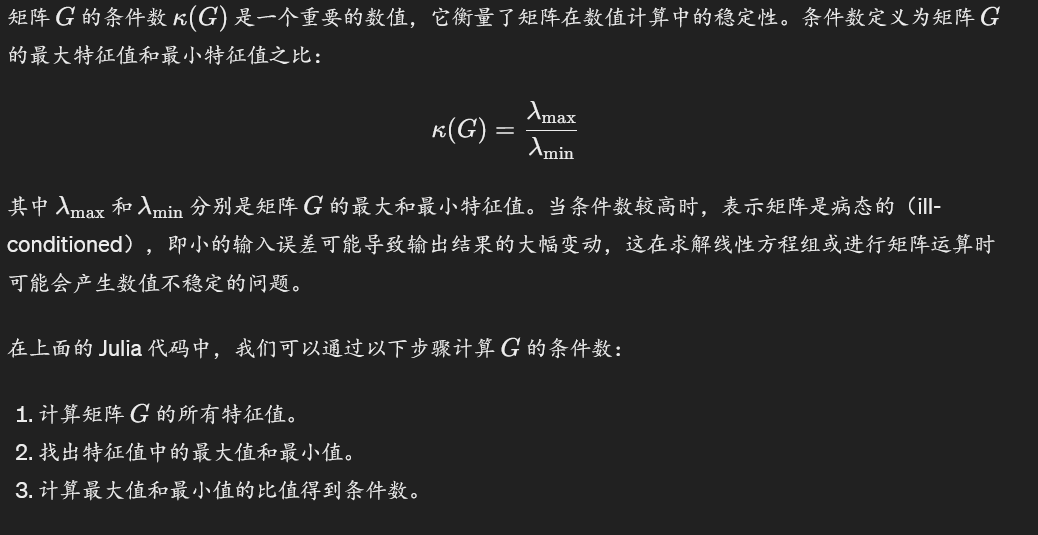

# Strassen 算法的 Julia 实现

### Problem 2 - The Strassen algorithm

The Strassen algorithm is a method for matrix-matrix multiplication which performs asymptotically fewer operations than the standard method for large matrices (but it is still slower in practice for most matrices). Consider the matrix-matrix product $C=AB$, where $A,B,C$ are $n$-by-$n$ matrices and $n$ is a power of 2. Partition the matrices as

$$
A =
\begin{pmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{pmatrix}, \quad
B =
\begin{pmatrix}
B_{11} & B_{12} \\
B_{21} & B_{22}
\end{pmatrix}, \quad
C =
\begin{pmatrix}
C_{11} & C_{12} \\
C_{21} & C_{22}
\end{pmatrix}
$$

where all submatrices are of size $n/2$-by-$n/2$. Now evaluate the following 7 (smaller) matrix-matrix products recursively:

$$
\begin{align*}
M_1 &= (A_{11} + A_{22})(B_{11} + B_{22}) \\
M_2 &= (A_{21} + A_{22})B_{11} \\
M_3 &= A_{11}(B_{12} - B_{22}) \\
M_4 &= A_{22}(B_{21} - B_{11}) \\
M_5 &= (A_{11} + A_{12})B_{22} \\
M_6 &= (A_{21} - A_{11})(B_{11} + B_{12}) \\
M_7 &= (A_{12} - A_{22})(B_{21} + B_{22})
\end{align*}
$$

and finally form $C$ from the following submatrices:

$$
\begin{align*}
C_{11} &= M_1 + M_4 - M_5 + M_7 \\
C_{12} &= M_3 + M_5 \\
C_{21} &= M_2 + M_4 \\
C_{22} &= M_1 - M_2 + M_3 + M_6
\end{align*}
$$

Implement this algorithm as a function `strassen(A,B)`, which assumes the size of `A` and `B` are powers of 2. The base case is when the matrix sizes are 1-by-1, and the multiplication is a scalar multiplication. Note: this means that your implementation cannot perform matrix multiplication at any point, only scalar multiplication.

In [10]:
# 我们需要定义一个函数来递归地实现 Strassen 算法。
# 该函数将矩阵分解为四个子矩阵，并计算七个矩阵乘法，
# 然后组合这些结果来形成最终的乘积矩阵。

In [9]:
using LinearAlgebra

function strassen(A, B)
    n = size(A, 1)
    if n == 1
        return A * B  # 当矩阵是1x1时，直接进行标量乘法
    else
        m = n ÷ 2
        # 分解矩阵 A 和 B 为四个子矩阵
        A11 = A[1:m, 1:m]
        A12 = A[1:m, m+1:end]
        A21 = A[m+1:end, 1:m]
        A22 = A[m+1:end, m+1:end]
        B11 = B[1:m, 1:m]
        B12 = B[1:m, m+1:end]
        B21 = B[m+1:end, 1:m]
        B22 = B[m+1:end, m+1:end]

        # 根据 Strassen 算法计算7个矩阵乘法
        M1 = strassen(A11 + A22, B11 + B22)
        M2 = strassen(A21 + A22, B11)
        M3 = strassen(A11, B12 - B22)
        M4 = strassen(A22, B21 - B11)
        M5 = strassen(A11 + A12, B22)
        M6 = strassen(A21 - A11, B11 + B12)
        M7 = strassen(A12 - A22, B21 + B22)

        # 组合得到最终的四个子矩阵 C11, C12, C21, C22
        C11 = M1 + M4 - M5 + M7
        C12 = M3 + M5
        C21 = M2 + M4
        C22 = M1 - M2 + M3 + M6

        # 构建最终矩阵 C
        C = [C11 C12; C21 C22]
        return C
    end
end

# 示例矩阵和测试
A = randn(256, 256)
B = randn(256, 256)
C = strassen(A, B)
D = A * B
println("最大差异: ", maximum(abs.(C - D)))  # 应该非常小


最大差异: 5.7411853049416095e-12


Test your function using the commands below.

In [11]:
A = randn(256,256)
B = randn(256,256)
C = strassen(A,B)
D = A * B
maximum(abs.(C-D))     # Should be very small

5.842104577880036e-12

# 对数据进行多项式拟合的问题
我们需要将线性回归模型推广到多项式回归。这可以通过构造一个范德蒙矩阵来完成，该矩阵包含了自变量 xx 的幂次，从1次到 pp 次，然后使用最小二乘法来求解。

### Problem 3 - Polynomial data fitting

Generalize the example on linear regression from the lecture notebook, to fit a polynomial of degree $p\ge 1$ to the data (the linear regression example corresponds to $p=1$).

#### Problem 3(a)

Write a function with the syntax `pol = polyfit(x, y, p)` which computes a polynomial `pol` of degree `p` that is a least-squares fit of the data `x,y`.

In [13]:
import Pkg; Pkg.add("Polynomials")

   Resolving package versions...
   Installed Setfield ──── v1.1.1
   Installed Polynomials ─ v4.0.8
    Updating `C:\Users\Administrator\.julia\environments\v1.9\Project.toml`
  [f27b6e38] + Polynomials v4.0.8
    Updating `C:\Users\Administrator\.julia\environments\v1.9\Manifest.toml`
  [f27b6e38] + Polynomials v4.0.8
  [efcf1570] + Setfield v1.1.1
  [9fa8497b] + Future
Precompiling project...
  ✓ Setfield
  ✓ Polynomials
  ✓ Polynomials → PolynomialsChainRulesCoreExt
  ✓ Polynomials → PolynomialsFFTWExt
  4 dependencies successfully precompiled in 27 seconds. 237 already precompiled.


In [15]:

# 问题 3(a) - 编写多项式拟合函数
using LinearAlgebra, Polynomials

function polyfit(x, y, p)
    # 创建一个 Vandermonde 矩阵，列对应 x 的 0 到 p 次幂
    n = length(x)
    V = [x.^i for i in 0:p]'
    # 使用最小二乘法求解多项式系数
    coeffs = V \ y
    # 返回多项式对象
    return Polynomial(coeffs)
end



polyfit (generic function with 1 method)

#### Problem 3(b)

Write a function with the syntax `yy = polyval(pol, xx)` which evaluates the polynomial `pol` at all the $x$-values in `xx`.

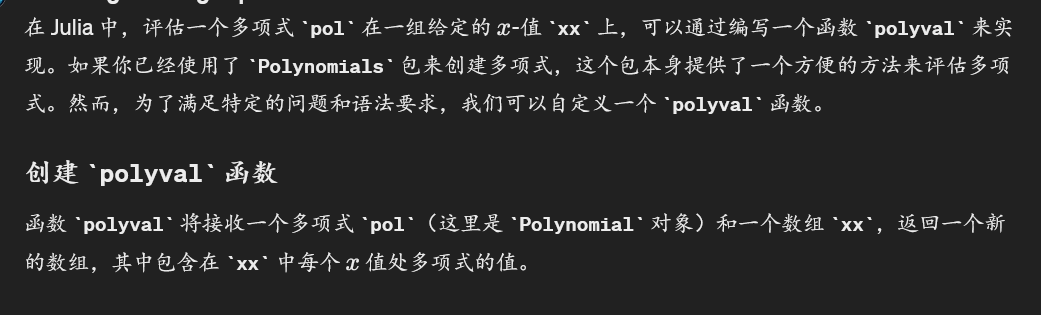

In [19]:
using Polynomials

function polyval(pol, xx)
    # 使用内置函数 `pol` 对每个元素 x in xx 进行评估
    return map(x -> pol(x), xx)
end

polyval (generic function with 1 method)

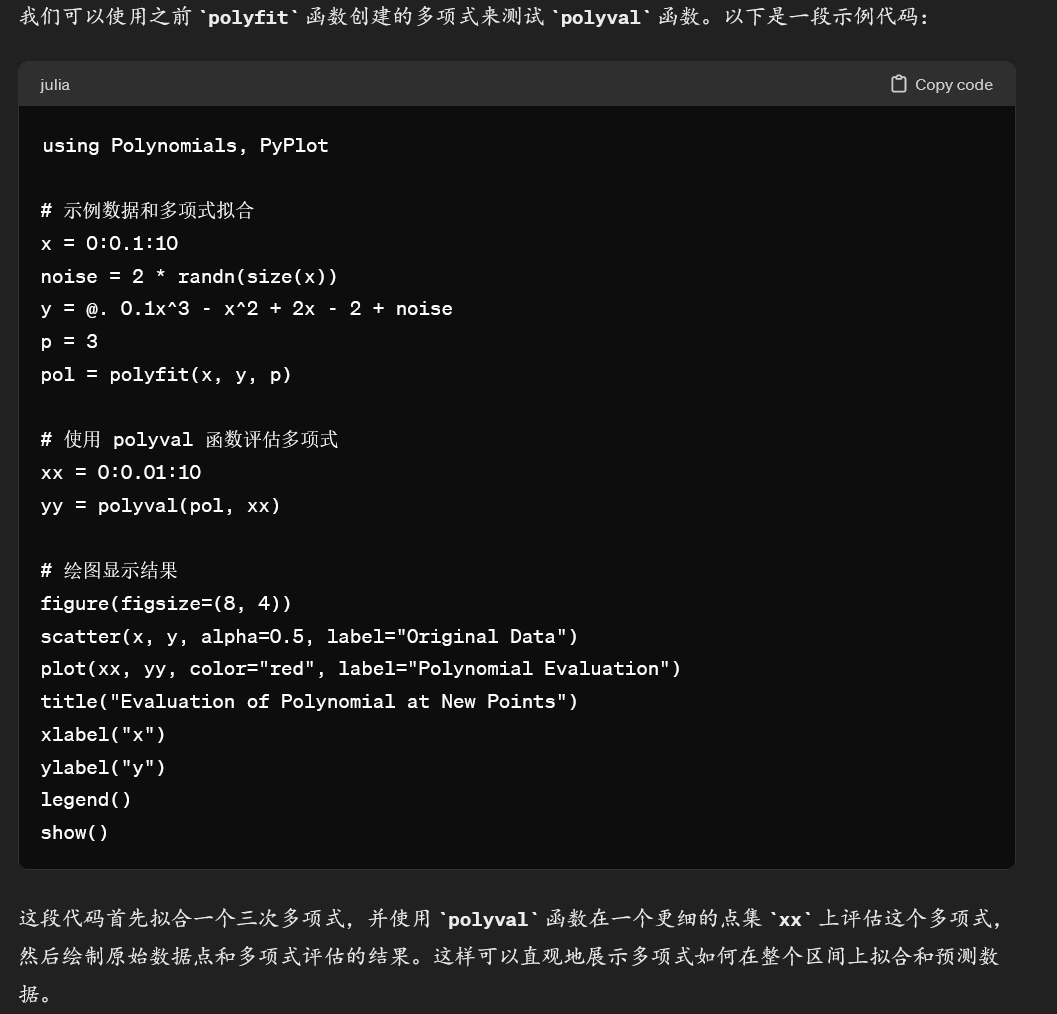

In [18]:
using Polynomials, PyPlot

# 示例数据和多项式拟合
x = 0:0.1:10
noise = 2 * randn(size(x))
y = @. 0.1x^3 - x^2 + 2x - 2 + noise
p = 3
pol = polyfit(x, y, p)

# 使用 polyval 函数评估多项式
xx = 0:0.01:10
yy = polyval(pol, xx)

# 绘图显示结果
figure(figsize=(8, 4))
scatter(x, y, alpha=0.5, label="Original Data")
plot(xx, yy, color="red", label="Polynomial Evaluation")
title("Evaluation of Polynomial at New Points")
xlabel("x")
ylabel("y")
legend()
show()


LoadError: MethodError: no method matching zero(::Type{Adjoint{Float64, Vector{Float64}}})

[0mClosest candidates are:
[0m  zero([91m::Union{Type{P}, P}[39m) where P<:Dates.Period
[0m[90m   @[39m [32mDates[39m [90mC:\App\Julia-1.9.0\share\julia\stdlib\v1.9\Dates\src\[39m[90m[4mperiods.jl:51[24m[39m
[0m  zero([91m::UniformScaling{T}[39m) where T
[0m[90m   @[39m [35mLinearAlgebra[39m [90mC:\App\Julia-1.9.0\share\julia\stdlib\v1.9\LinearAlgebra\src\[39m[90m[4muniformscaling.jl:135[24m[39m
[0m  zero([91m::Diagonal[39m)
[0m[90m   @[39m [35mLinearAlgebra[39m [90mC:\App\Julia-1.9.0\share\julia\stdlib\v1.9\LinearAlgebra\src\[39m[90m[4mspecial.jl:374[24m[39m
[0m  ...


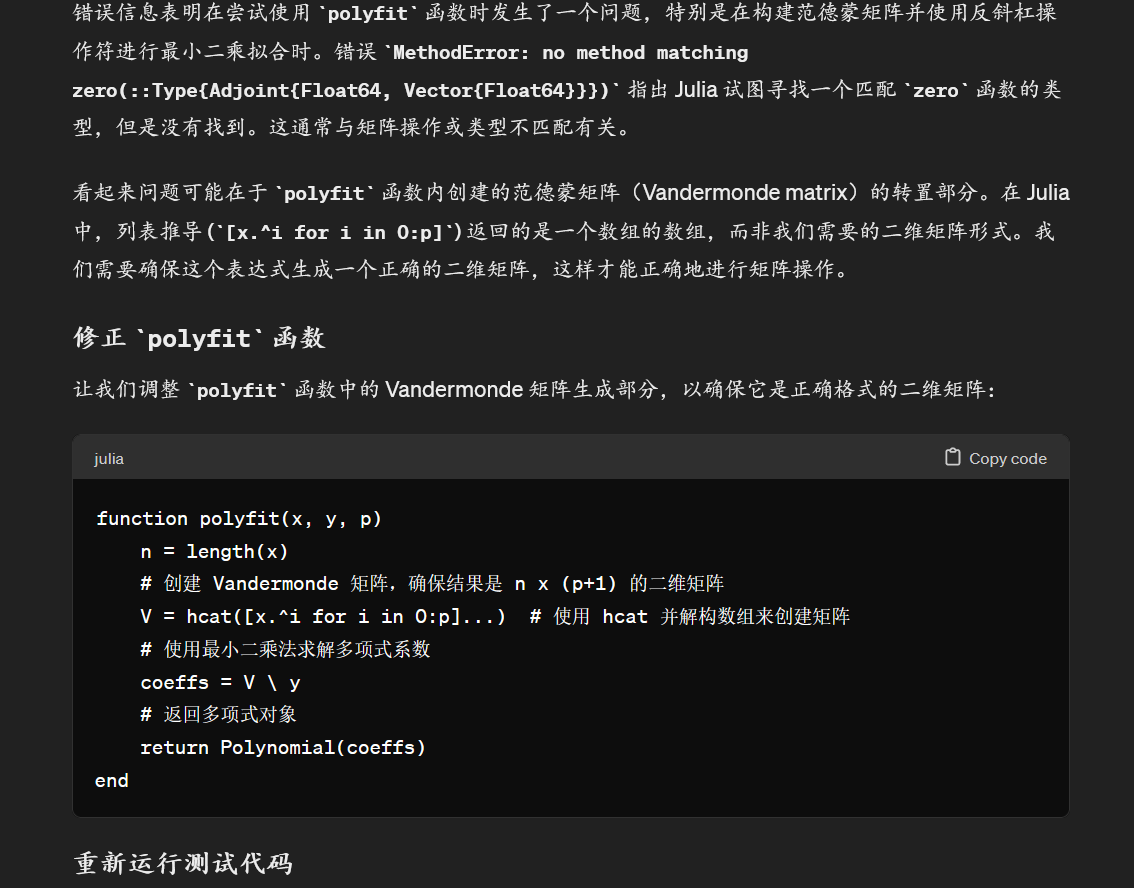

In [20]:
function polyfit(x, y, p)
    n = length(x)
    # 创建 Vandermonde 矩阵，确保结果是 n x (p+1) 的二维矩阵
    V = hcat([x.^i for i in 0:p]...)  # 使用 hcat 并解构数组来创建矩阵
    # 使用最小二乘法求解多项式系数
    coeffs = V \ y
    # 返回多项式对象
    return Polynomial(coeffs)
end


polyfit (generic function with 1 method)

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


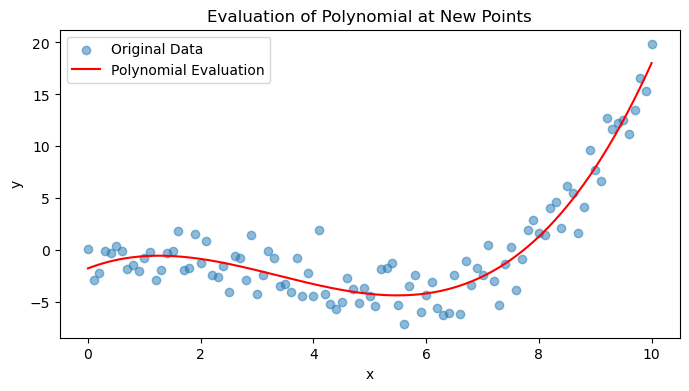

In [21]:
using Polynomials, PyPlot

# 示例数据和多项式拟合
x = 0:0.1:10
noise = 2 * randn(size(x))
y = @. 0.1x^3 - x^2 + 2x - 2 + noise
p = 3
pol = polyfit(x, y, p)

# 使用 polyval 函数评估多项式
xx = 0:0.01:10
yy = polyval(pol, xx)

# 绘图显示结果
figure(figsize=(8, 4))
scatter(x, y, alpha=0.5, label="Original Data")
plot(xx, yy, color="red", label="Polynomial Evaluation")
title("Evaluation of Polynomial at New Points")
xlabel("x")
ylabel("y")
legend()
show()


#### Problem 3(c)

Demonstrate your functions by fitting a cubic polynomial to the following data, and plotting in the same way as in the lecture notebook:

In [ ]:
x = 0:0.1:10
noise = 2randn(size(x))
y = @. 0.1x^3 - x^2 + 2x - 2 + noise; # Example data: cubic with noise

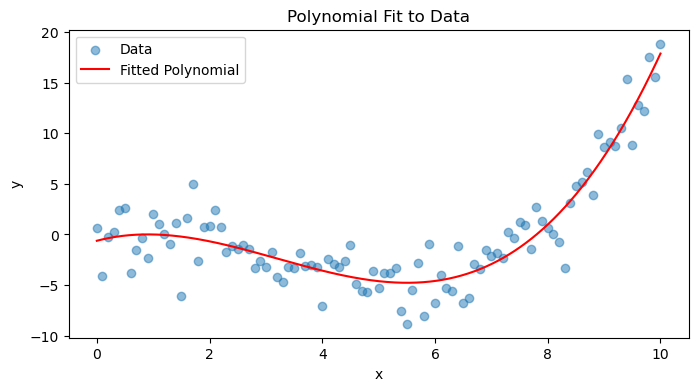

In [22]:
using PyPlot

# 示例数据，定义 x 和噪声以及 y
x = 0:0.1:10
noise = 2 * randn(size(x))
y = @. 0.1x^3 - x^2 + 2x - 2 + noise

# 使用 polyfit 函数拟合一个三次多项式
p = 3
pol = polyfit(x, y, p)

# 生成用于绘图的平滑数据点
x_fine = 0:0.01:10
y_fine = polyval(pol, x_fine)

# 绘图
figure(figsize=(8, 4))
scatter(x, y, alpha=0.5, label="Data")
plot(x_fine, y_fine, color="red", label="Fitted Polynomial")
title("Polynomial Fit to Data")
xlabel("x")
ylabel("y")
legend()
show()


# 检查是否存在三个连续的双字母

### Problem 4 - Strings and File Processing

From Think Julia:

> Give me a word with three consecutive double letters. I’ll give you a couple of words that
> almost qualify, but don’t. For example, the word committee, c-o-m-m-i-t-t-e-e. It would be
> great except for the i that sneaks in there. Or Mississippi: M-i-s-s-i-s-s-i-p-p-i. If you
> could take out those i’s it would work. But there is a word that has three consecutive pairs
> of letters and to the best of my knowledge this may be the only word. Of course there are
> probably 500 more but I can only think of one. What is the word?

Write a program to find these words. First download the file <https://github.com/BenLauwens/ThinkJulia.jl/blob/master/data/words.txt> to your computer, and upload it to the datahub in the same directory that you keep your notebook. Then read each line of the file, and if the you find the pattern described above, print the word.

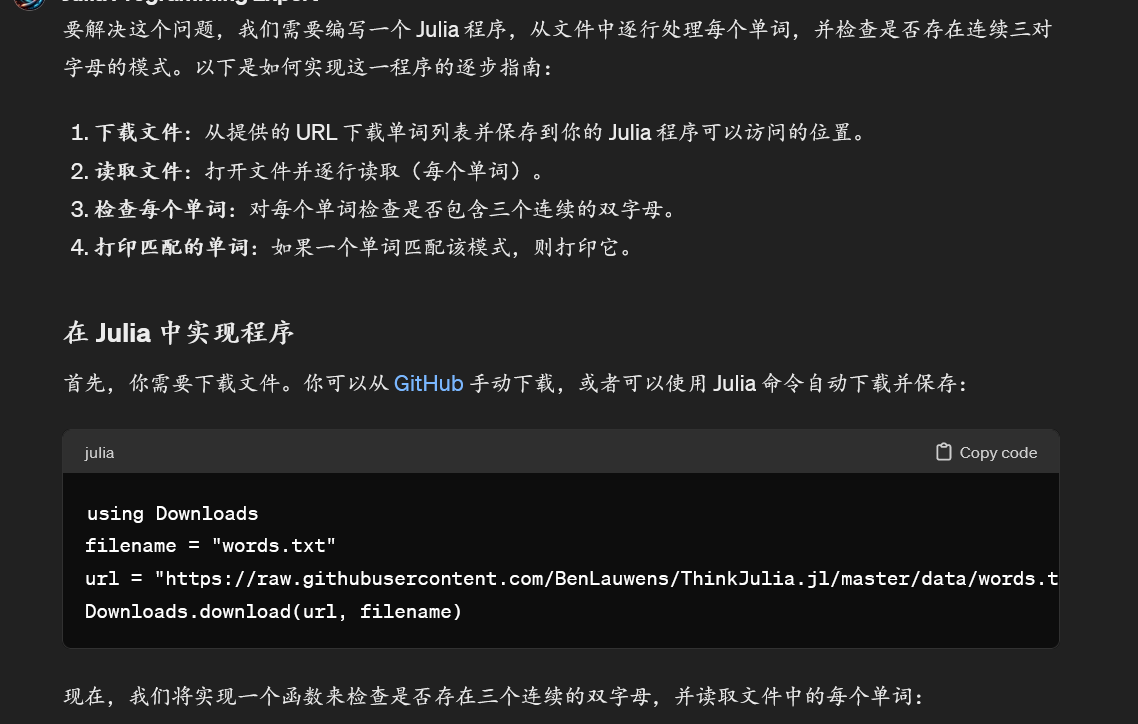

In [25]:
using Downloads
filename = "words.txt"
url = "https://raw.githubusercontent.com/BenLauwens/ThinkJulia.jl/master/data/words.txt"
Downloads.download(url, filename)

LoadError: RequestError: SSL/TLS connection timeout while requesting https://raw.githubusercontent.com/BenLauwens/ThinkJulia.jl/master/data/words.txt

In [24]:
function has_three_consecutive_doubles(word)
    count = 0
    i = 1
    while i <= length(word) - 1
        if word[i] == word[i+1]
            count += 1
            if count == 3
                return true
            end
            i += 2  # 跳过这一对字母
        else
            count = 0
            i += 1
        end
    end
    return false
end

# 读取文件并检查每个单词
function find_special_words(filename)
    open(filename, "r") do file
        for line in eachline(file)
            word = strip(line)  # 移除任何周围的空白
            if has_three_consecutive_doubles(word)
                println(word)
            end
        end
    end
end

# 示例用法
find_special_words("words.txt")


LoadError: SystemError: opening file "words.txt": No such file or directory